# Análise dos dados brutos de Viagens_2025

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [10]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [72]:
df = pd.read_csv(
    "dados_brutos.csv",
    sep=";",
    encoding="latin1",
    decimal=',',
    thousands='.'
)


In [73]:
top_destinos = df['Destinos'].value_counts().head(15).reset_index()
top_destinos.columns = ['Cidade/UF', 'Qtd_Viagens']

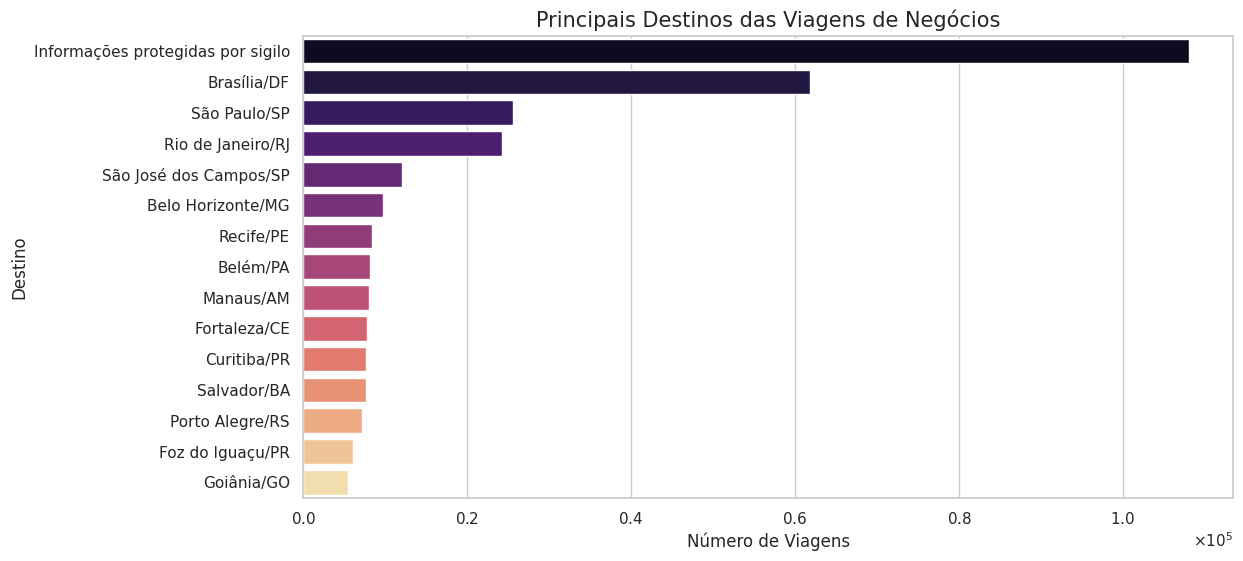

In [74]:
ax = sns.barplot(
    data=top_destinos, 
    x='Qtd_Viagens', 
    y='Cidade/UF', 
    hue='Cidade/UF', 
    palette='magma', 
    legend=False
)

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0, 0))  

ax.xaxis.set_major_formatter(formatter)

plt.title('Principais Destinos das Viagens de Negócios', fontsize=15)
plt.xlabel('Número de Viagens', fontsize=12)
plt.ylabel('Destino', fontsize=12)
plt.show()

A análise dos principais destinos das viagens de negócios em 2025 evidencia que o maior volume de deslocamentos está classificado como “Informações protegidas por sigilo”, seguido por Brasília/DF.  
O predomínio de destinos **protegidos por sigilo** está diretamente relacionado à natureza sensível de determinadas missões governamentais, especialmente aquelas associadas a órgãos de segurança pública, defesa nacional e inteligência institucional. Nesses casos, a divulgação do destino poderia comprometer operações estratégicas, investigações em andamento ou a segurança dos servidores envolvidos, justificando a omissão dessa informação nos dados públicos.  
Em segundo lugar, **Brasília** se destaca por ser o principal centro administrativo e político do país, concentrando ministérios, autarquias, agências reguladoras e órgãos superiores da administração pública federal. Grande parte das viagens institucionais tem como objetivo reuniões interministeriais, capacitações, audiências técnicas, eventos oficiais e tomadas de decisão centralizadas, o que explica o elevado volume de deslocamentos para a capital federal.  

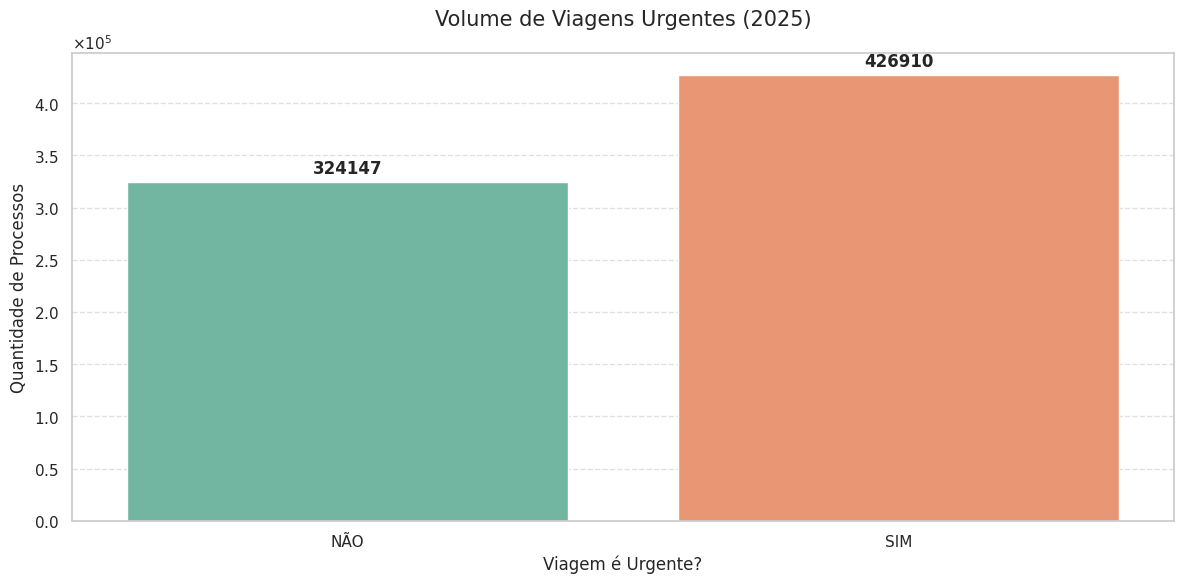

In [93]:
ax = sns.countplot(
    data=df, 
    x='Viagem Urgente', 
    hue='Viagem Urgente',
    palette='Set2', 
    legend=False
)
for p in plt.gca().patches:
    plt.gca().annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 10), 
        textcoords='offset points', 
        fontweight='bold',
        fontsize=12
    )
    
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0, 0))

ax.yaxis.set_major_formatter(formatter)

plt.title('Volume de Viagens Urgentes (2025)', fontsize=15, pad=20)
plt.xlabel('Viagem é Urgente?', fontsize=12)
plt.ylabel('Quantidade de Processos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

O gráfico demonstra que a maioria das viagens realizadas é classificada como **urgente**, superando significativamente o volume de viagens planejadas.  
Esse comportamento pode ser explicado pela própria dinâmica da administração pública, especialmente em áreas como segurança, fiscalização, defesa, educação superior e pesquisa. Demandas emergenciais, como operações policiais, ações de fiscalização, substituições de servidores, participação em eventos institucionais não previstos e cumprimento de prazos legais, frequentemente exigem deslocamentos em curto prazo.  
Além disso, processos administrativos muitas vezes são formalizados apenas quando a necessidade já está consolidada, levando à classificação da viagem como urgente, mesmo quando ela decorre de atividades recorrentes. Esse padrão indica uma baixa previsibilidade operacional em determinados órgãos e reforça a necessidade de análises futuras sobre planejamento logístico e orçamentário.  

In [76]:
top_funcoes = df['Descrição Função'].value_counts().head(10).reset_index()
top_funcoes.columns = ['Função', 'Quantidade']


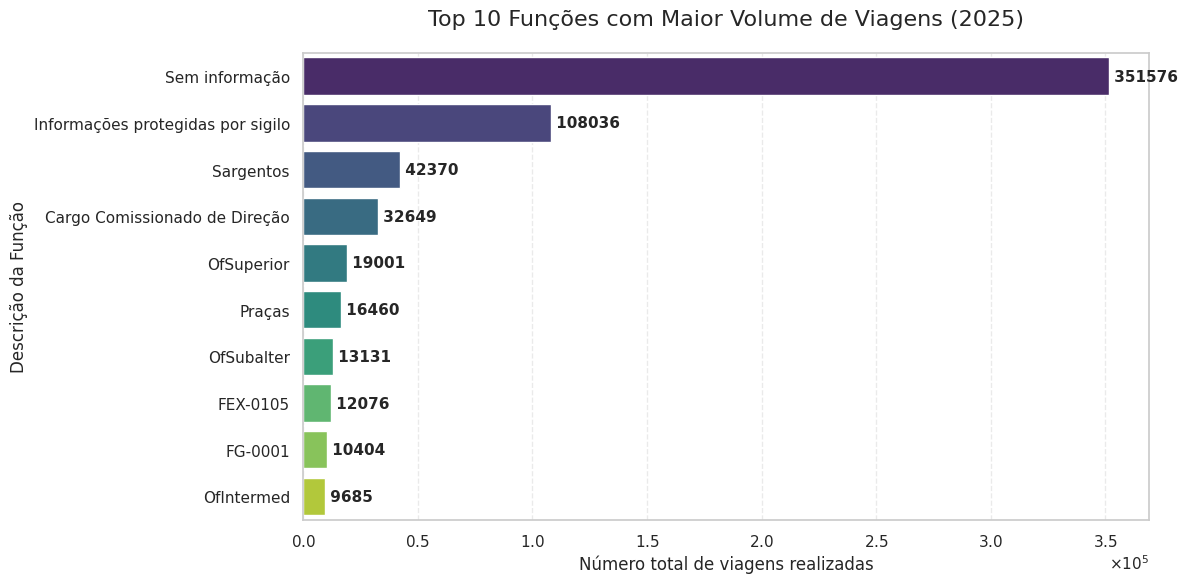

In [77]:
ax = sns.barplot(
    data=top_funcoes, 
    x='Quantidade', 
    y='Função', 
    hue='Função',
    palette='viridis', 
    legend=False
)

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0, 0))  

ax.xaxis.set_major_formatter(formatter)

for index, value in enumerate(top_funcoes['Quantidade']):
    plt.text(value, index, f' {int(value)}', va='center', fontsize=11, fontweight='bold')

plt.title('Top 10 Funções com Maior Volume de Viagens (2025)', fontsize=16, pad=20)
plt.xlabel('Número total de viagens realizadas', fontsize=12)
plt.ylabel('Descrição da Função', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

A distribuição das funções com maior volume de viagens revela três destaques principais:  
- Funções sem informação  
- Informações protegidas por sigilo  
- Sargentos  
A categoria **“sem informação”** representa, majoritariamente, servidores civis cujas funções não pertencem às carreiras militares do Exército, Marinha ou Aeronáutica. Em muitos casos, a ausência de detalhamento decorre de inconsistências no preenchimento dos dados, padronização insuficiente dos cargos civis ou limitações do sistema de registro, especialmente em universidades, institutos de pesquisa e órgãos administrativos.  
A presença significativa de **funções protegidas por sigilo** reforça o papel de servidores envolvidos em atividades sensíveis, como agentes de segurança, investigadores, analistas de inteligência e equipes de operações especiais, cujas atribuições demandam mobilidade frequente e confidencialidade.  
Por fim, os **sargentos** aparecem como a principal função explicitamente identificada, o que é coerente com a estrutura das Forças Armadas, onde sargentos desempenham funções operacionais, administrativas e de instrução, frequentemente exigindo deslocamentos para cursos, treinamentos, missões e apoio logístico em diferentes localidades do país.  

In [78]:
top_orgaos = df['Nome órgão solicitante'].value_counts().nlargest(10).index
top_cargos = df['Descrição Função'].value_counts().nlargest(10).index

In [79]:
df_cruzado = df[df['Nome órgão solicitante'].isin(top_orgaos) & 
                df['Descrição Função'].isin(top_cargos)]


In [80]:
matriz_viagens = df_cruzado.groupby(['Nome órgão solicitante', 'Descrição Função']).size().unstack(fill_value=0)


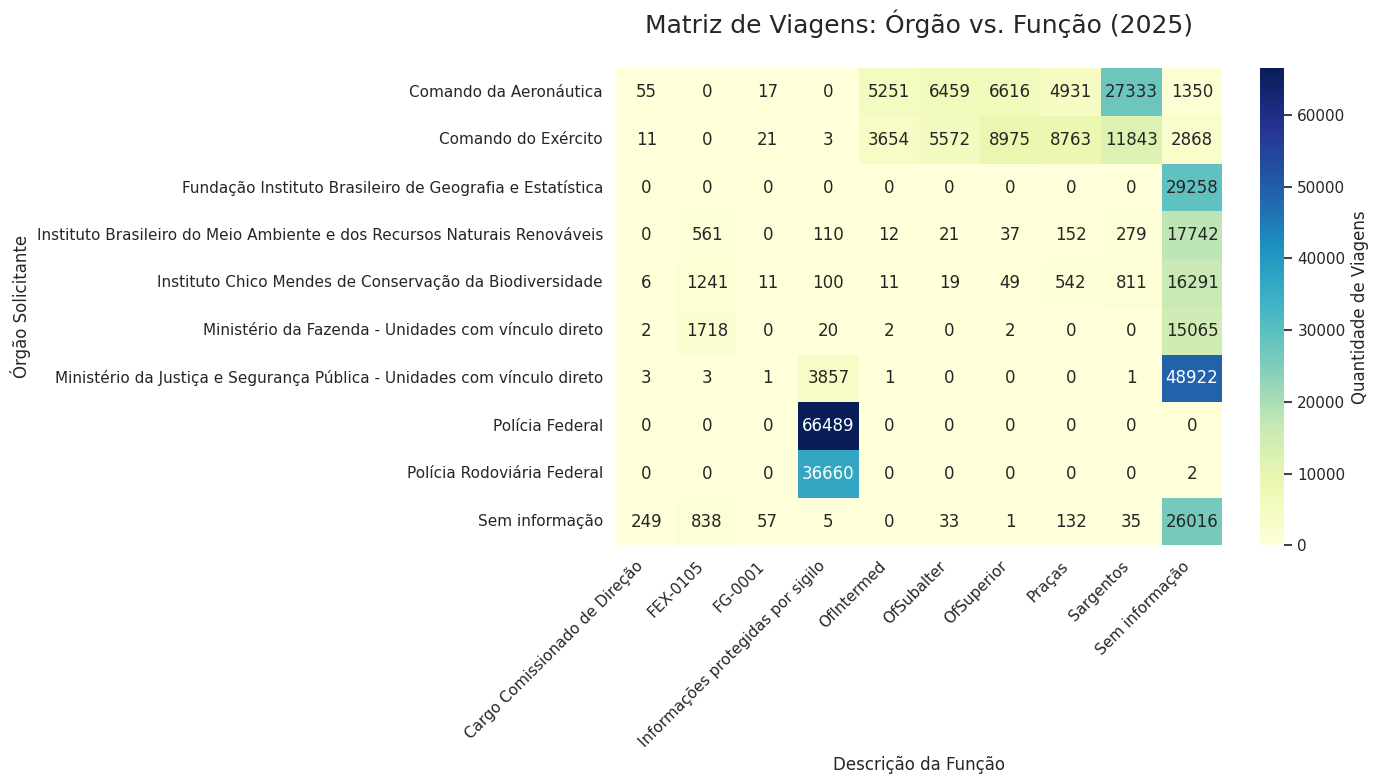

In [81]:
plt.figure(figsize=(14, 8))
sns.heatmap(
    matriz_viagens,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    cbar_kws={'label': 'Quantidade de Viagens'}
)
plt.title('Matriz de Viagens: Órgão vs. Função (2025)', fontsize=18, pad=25)
plt.xlabel('Descrição da Função', fontsize=12)
plt.ylabel('Órgão Solicitante', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

A matriz de viagens que relaciona órgãos solicitantes e funções evidencia padrões claros de mobilidade institucional:  
**Polícia Federal**: Informações protegidas por sigilo apresenta o maior volume de viagens, refletindo a atuação nacional da instituição em operações policiais, investigações federais, cooperação internacional e ações de inteligência.  
**Ministério da Justiça**: Funções sem informação surge em seguida, o que pode ser atribuído à diversidade de carreiras civis vinculadas ao órgão e à falta de padronização no registro das funções.  
**Polícia Rodoviária Federal**: Informações protegidas por sigilo mantém um volume elevado, compatível com atividades de fiscalização, operações especiais e ações integradas em diferentes estados.  
**IBGE**: Funções sem informação destaca-se devido à natureza itinerante de suas atividades, como censos, pesquisas de campo e levantamentos estatísticos em todo o território nacional.  
**Comando da Aeronáutica**: Sargentos reflete a estrutura operacional da Força Aérea, na qual sargentos participam ativamente de missões, cursos de formação, manutenção, logística e apoio aéreo, demandando deslocamentos frequentes.  
De forma geral, a matriz evidencia que o volume de viagens está fortemente associado à natureza operacional dos órgãos e ao grau de sensibilidade das funções exercidas, reforçando a coerência dos dados com a realidade institucional do setor público federal.  

RELATÓRIO – FUNÇÃO = -1
Total de registros-----------------------: 751,057
Função = -1 (Função Não Informada)-------: 351,576
Outras funções---------------------------: 399,481


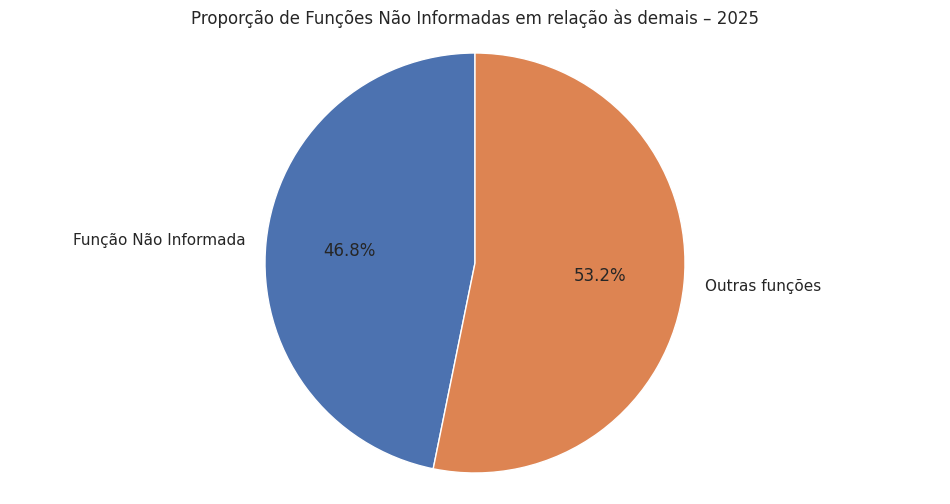

In [82]:
funcao = df['Função']
total_linhas = len(df)
qtd_funcao_menos_um = (funcao == '-1').sum()
qtd_outras_funcoes = total_linhas - qtd_funcao_menos_um

print("RELATÓRIO – FUNÇÃO = -1")
print(f"Total de registros-----------------------: {total_linhas:,}")
print(f"Função = -1 (Função Não Informada)-------: {qtd_funcao_menos_um:,}")
print(f"Outras funções---------------------------: {qtd_outras_funcoes:,}")

# Gráfico de pizza
labels = ['Função Não Informada', 'Outras funções']
sizes = [qtd_funcao_menos_um, qtd_outras_funcoes]

plt.figure()
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Proporção de Funções Não Informadas em relação às demais – 2025')
plt.axis('equal')
plt.show()


A análise evidencia que a maioria das viagens está associada a **funções não informadas**, superando aquelas com descrição funcional preenchida.  
Esse resultado decorre principalmente de regras de negócio e limitações operacionais dos sistemas de registro utilizados pelos órgãos públicos. Em muitos casos, a função do servidor não é um campo obrigatório ou não possui validação rígida, especialmente para carreiras civis, pesquisadores, técnicos administrativos, docentes e servidores com vínculos temporários ou múltiplas atribuições.  
Além disso, há órgãos cuja estrutura organizacional prioriza o registro do cargo formal ou do órgão de lotação, desprezando a descrição funcional a um nível secundário. Isso resulta em grande volume de registros classificados como “não informados”, sem que isso represente ausência de vínculo profissional, mas sim deficiência de padronização e governança de dados.  
Do ponto de vista analítico, esse cenário impõe limitações à segmentação funcional e reforça a necessidade de tratamentos posteriores na camada Silver e Gold do modelo Medallion, como padronização, enriquecimento e categorização das funções.  

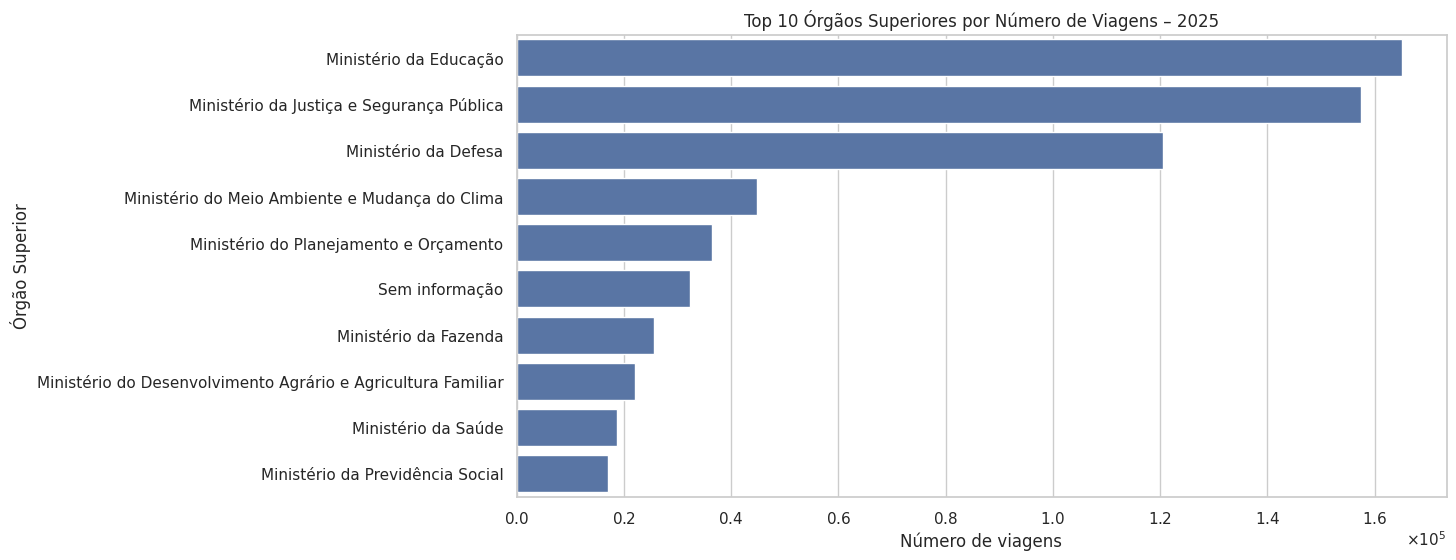

In [94]:
orgao_superior = df['Nome órgão solicitante']

viagens_por_orgao = (
    df['Nome do órgão superior']
    .value_counts()
    .reset_index()
)

viagens_por_orgao.columns = ['Órgão Superior', 'Número de Viagens']

top_10 = viagens_por_orgao.head(10)

ax = sns.barplot(
    data=top_10,
    y='Órgão Superior',
    x='Número de Viagens'
)

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0, 0))

ax.xaxis.set_major_formatter(formatter)

plt.title('Top 10 Órgãos Superiores por Número de Viagens – 2025')
plt.xlabel('Número de viagens')
plt.ylabel('Órgão Superior')
plt.show()

O gráfico revela que o Ministério da Educação (MEC) lidera o número de viagens realizadas, seguido pelo Ministério da Justiça e pelo Ministério da Defesa.  
A liderança do **MEC** está diretamente associada à sua estrutura descentralizada e distribuída, composta por universidades federais, institutos federais, fundações e centros de pesquisa distribuídos em todo o território nacional. Essas instituições demandam viagens frequentes para atividades acadêmicas, administrativas, bancas, eventos científicos, capacitações e projetos de pesquisa, resultando em elevado volume de deslocamentos.  
O **Ministério da Justiça** aparece em segundo lugar devido à atuação contínua de órgãos vinculados como Polícia Federal, Polícia Rodoviária Federal e secretarias finalísticas, cujas atividades operacionais exigem mobilidade constante.  
Já o **Ministério da Defesa** reflete a natureza das Forças Armadas, nas quais missões, treinamentos, cursos, operações logísticas e deslocamentos estratégicos fazem parte da rotina institucional, justificando o alto volume de viagens.  

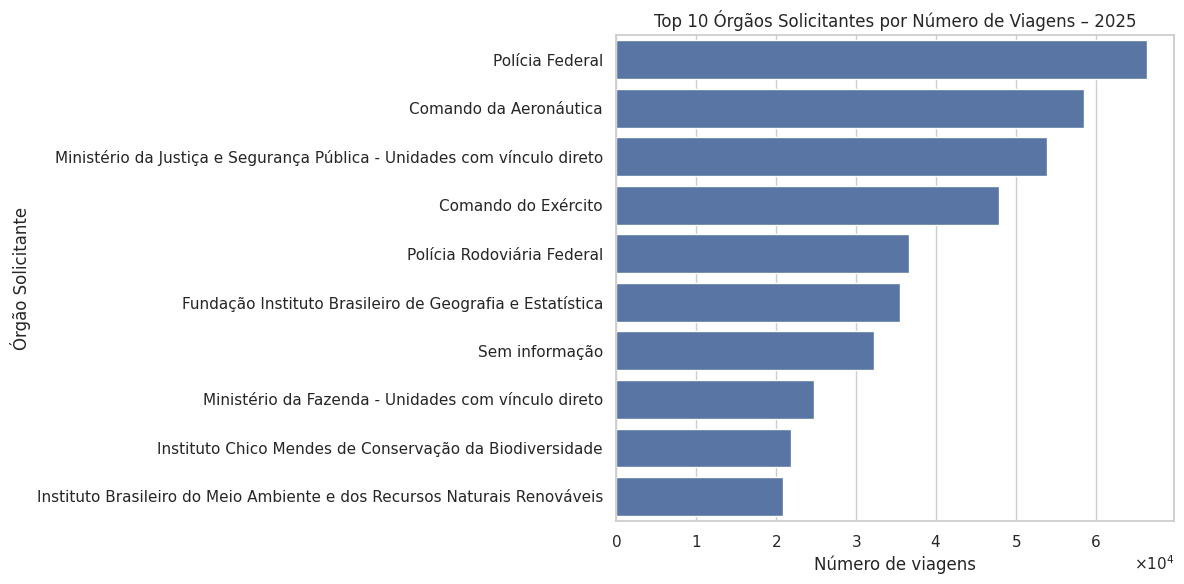

In [95]:
viagens_por_orgao_sol = (
    df['Nome órgão solicitante']
    .value_counts()
    .reset_index()
)

viagens_por_orgao_sol.columns = ['Órgão Solicitante', 'Número de Viagens']

top_10 = viagens_por_orgao_sol.head(10)

ax = sns.barplot(
    data=top_10,
    y='Órgão Solicitante',
    x='Número de Viagens'
)

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0, 0))
ax.xaxis.set_major_formatter(formatter)

plt.title('Top 10 Órgãos Solicitantes por Número de Viagens – 2025')
plt.xlabel('Número de viagens')
plt.ylabel('Órgão Solicitante')
plt.tight_layout()
plt.show()

No ranking de órgãos solicitantes, a Polícia Federal lidera de forma destacada, seguida pelo Comando da Aeronáutica, pelas unidades vinculadas diretamente ao Ministério da Justiça e pelo Comando do Exército.  
A predominância da **Polícia Federal** está alinhada às suas atribuições legais de atuação nacional, incluindo investigações, operações policiais, ações de inteligência, cooperação internacional e atividades administrativas descentralizadas. Essas funções demandam deslocamentos frequentes e, muitas vezes, urgentes.  
O **Comando da Aeronáutica** e o **Comando do Exército** refletem a estrutura operacional das Forças Armadas, onde servidores e militares participam constantemente de cursos, missões, treinamentos e atividades de apoio em diferentes regiões do país.  
As **unidades diretamente vinculadas ao Ministério da Justiça** reforçam o papel central do órgão na coordenação de políticas públicas sensíveis, segurança institucional e operações integradas, justificando o volume expressivo de solicitações de viagem.  

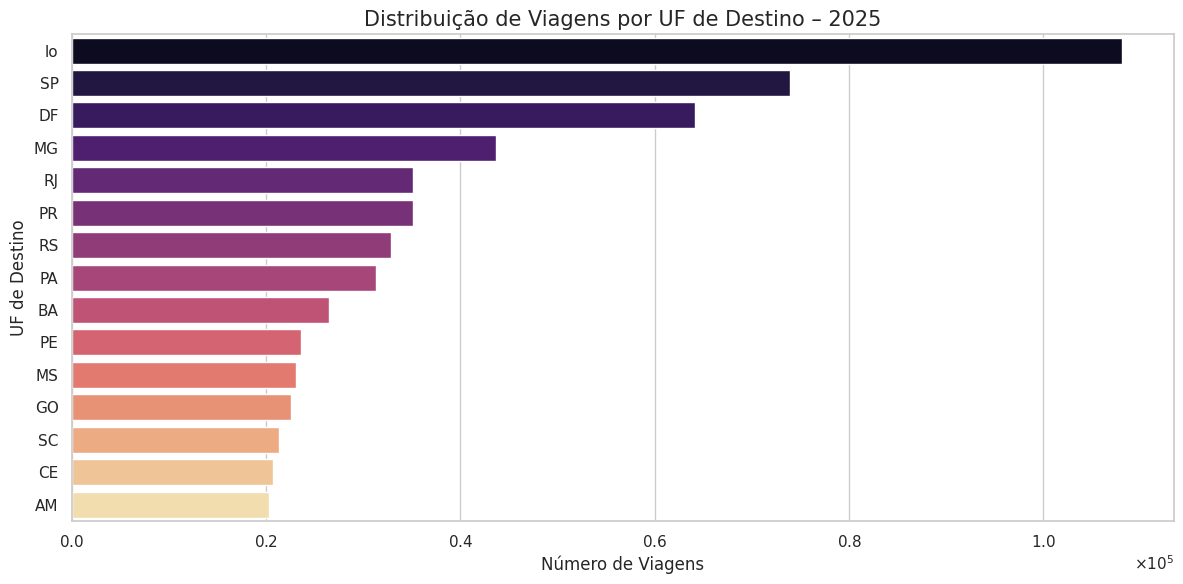

In [96]:
df['UF'] = df['Destinos'].str[-2:]

viagens_por_uf = (
    df['UF']
    .value_counts()
    .head(15)
    .reset_index()
)

viagens_por_uf.columns = ['UF', 'Quantidade']

ax = sns.barplot(
    data=viagens_por_uf,
    x='Quantidade',
    y='UF',
    hue='UF',
    palette='magma',
    legend=False
)

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0, 0))
ax.xaxis.set_major_formatter(formatter)

plt.title('Distribuição de Viagens por UF de Destino – 2025', fontsize=15)
plt.xlabel('Número de Viagens', fontsize=12)
plt.ylabel('UF de Destino', fontsize=12)
plt.tight_layout()
plt.show()


A distribuição das viagens por Unidade da Federação indica que destinos classificados como informações protegidas por sigilo lideram o volume de registros, seguidos por São Paulo (SP), Distrito Federal (DF), Minas Gerais (MG) e Rio de Janeiro (RJ).  
A liderança dos **destinos sigilosos** está diretamente relacionada a regras de confidencialidade, aplicadas principalmente a viagens associadas à segurança pública, defesa e inteligência. Nessas situações, a UF de destino é ocultada para preservar a integridade das operações e dos agentes envolvidos.  
Entre os destinos identificados, **São Paulo** destaca-se por ser o principal polo econômico do país, concentrando eventos institucionais, centros de pesquisa, universidades, empresas públicas e privadas, além de infraestrutura logística estratégica.  
O **Distrito Federal** mantém posição de destaque por concentrar os órgãos centrais da administração pública federal, enquanto **Minas Gerais** e **Rio de Janeiro** refletem sua relevância histórica, econômica, acadêmica e militar, além da presença de unidades estratégicas das Forças Armadas e instituições federais.  

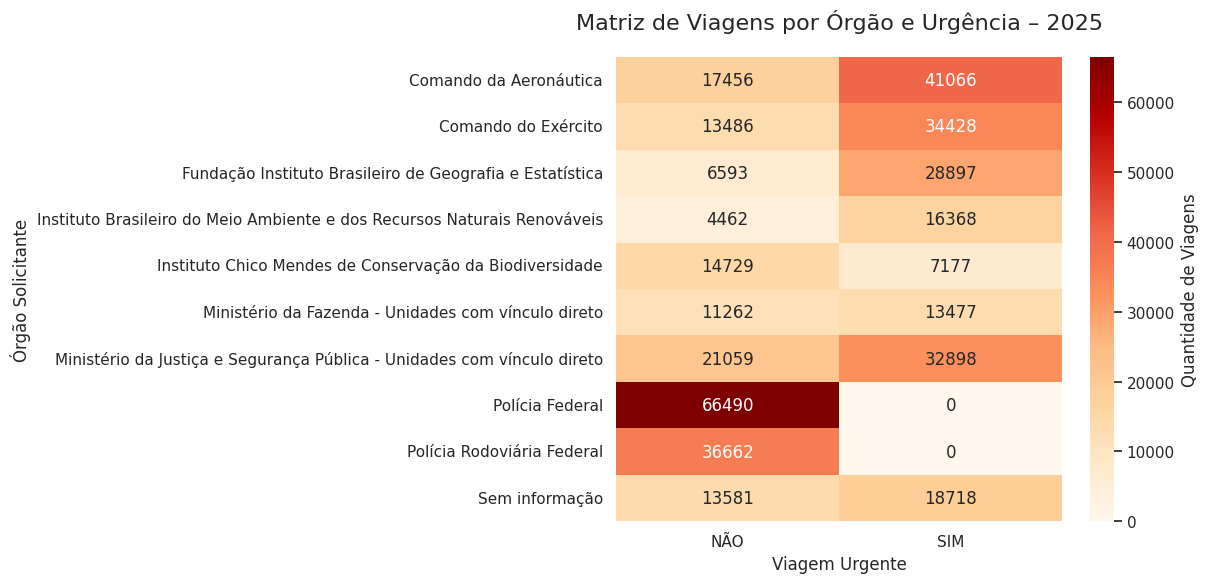

In [97]:
top_orgaos = df['Nome órgão solicitante'].value_counts().nlargest(10).index

df_heat = df[df['Nome órgão solicitante'].isin(top_orgaos)]

matriz_urgencia = (
    df_heat
    .groupby(['Nome órgão solicitante', 'Viagem Urgente'])
    .size()
    .unstack(fill_value=0)
)

plt.figure(figsize=(12, 6))
sns.heatmap(
    matriz_urgencia,
    annot=True,
    fmt='d',
    cmap='OrRd',
    cbar_kws={'label': 'Quantidade de Viagens'}
)

plt.title('Matriz de Viagens por Órgão e Urgência – 2025', fontsize=16, pad=20)
plt.xlabel('Viagem Urgente', fontsize=12)
plt.ylabel('Órgão Solicitante', fontsize=12)
plt.tight_layout()
plt.show()


A matriz que relaciona órgãos solicitantes e tipo de urgência da viagem evidencia padrões distintos de planejamento e resposta operacional entre as instituições analisadas.  
A **Polícia Federal** lidera o volume de viagens não urgentes, o que indica a existência de um volume significativo de deslocamentos planejados, associados a atividades administrativas, capacitações, missões previamente agendadas e cooperação institucional. Esse comportamento sugere um nível mais elevado de previsibilidade operacional em parte de suas atividades.  
Em contrapartida, **o Comando da Aeronáutica** apresenta predominância de viagens urgentes, refletindo a natureza altamente operacional e reativa de suas missões, que frequentemente demandam mobilização imediata para suporte logístico, treinamentos emergenciais, operações aéreas e deslocamentos estratégicos.  
A **Polícia Rodoviária Federal** também se destaca no grupo de viagens não urgentes, coerente com ações recorrentes de fiscalização, campanhas educativas, operações programadas e capacitações internas.  
Já o **Comando do Exército e as unidades vinculadas diretamente ao Ministério da Defesa** concentram viagens classificadas como urgentes, o que está alinhado à necessidade de resposta rápida em missões de defesa, operações logísticas, treinamentos táticos e apoio a ações emergenciais em diferentes regiões do país.  
Essa matriz evidencia que o grau de urgência das viagens está diretamente relacionado ao perfil operacional e estratégico de cada órgão, funcionando como um indicador indireto de maturidade no planejamento e da natureza das atividades desempenhadas.  

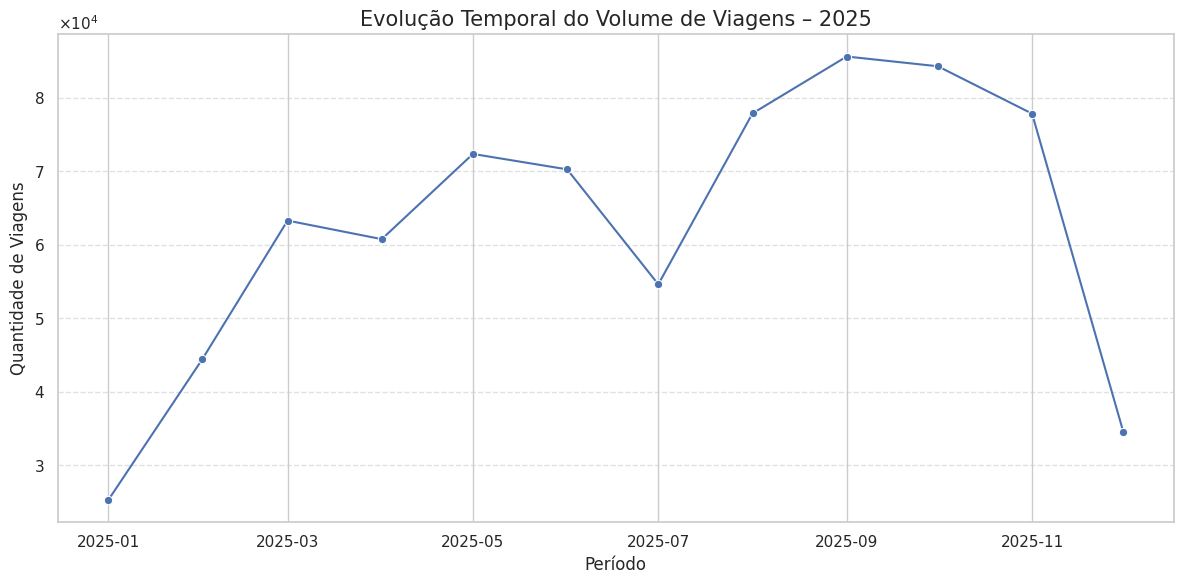

In [98]:
df['Período - Data de início'] = pd.to_datetime(
    df['Período - Data de início'],
    dayfirst=True,
    errors='coerce'
)

viagens_por_mes = (
    df
    .dropna(subset=['Período - Data de início'])
    .groupby(df['Período - Data de início'].dt.to_period('M'))
    .size()
    .reset_index(name='Quantidade')
)

viagens_por_mes['Período - Data de início'] = (
    viagens_por_mes['Período - Data de início']
    .dt.to_timestamp()
)

ax = sns.lineplot(
    data=viagens_por_mes,
    x='Período - Data de início',
    y='Quantidade',
    marker='o'
)

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((0, 0))
ax.yaxis.set_major_formatter(formatter)

plt.title('Evolução Temporal do Volume de Viagens – 2025', fontsize=15)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Quantidade de Viagens', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


A análise da evolução temporal do volume de viagens ao longo do ano revela um pico significativo no mês de **setembro**, seguido por **outubro**, **novembro** e **agosto**.  
Esse comportamento está fortemente associado ao calendário administrativo e orçamentário da administração pública federal. O segundo semestre concentra maior execução de atividades institucionais, projetos, eventos, capacitações e missões, muitas vezes impulsionadas pela necessidade de execução orçamentária antes do encerramento do exercício fiscal.  
Os meses de janeiro e dezembro apresentam os menores volumes de viagens. **Janeiro** é tradicionalmente marcado por férias coletivas, recesso parcial e redução do ritmo administrativo. **Dezembro**, por sua vez, sofre impacto do encerramento do exercício financeiro, recesso institucional e restrições operacionais, o que reduz significativamente a realização de deslocamentos.  
Essa sazonalidade é um padrão recorrente no setor público e deve ser considerada em análises de planejamento logístico, previsão de custos e alocação de recursos.  

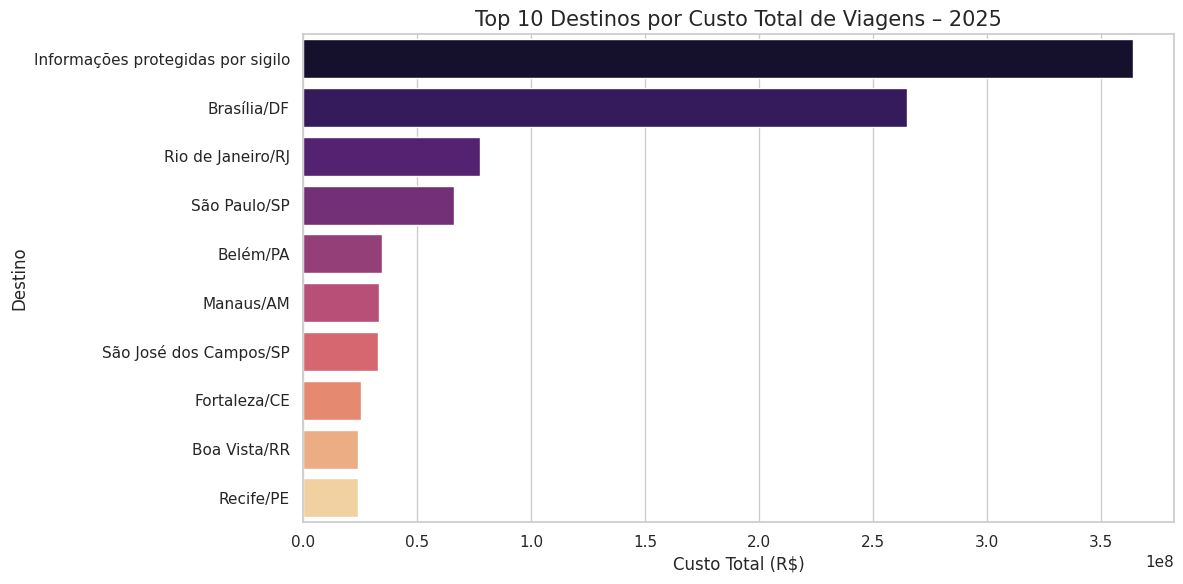

In [99]:
df['Valor_Total_Viagem'] = (
    df['Valor diárias'] +
    df['Valor passagens'] +
    df['Valor outros gastos']
)

top_custo_destino = (
    df.groupby('Destinos', as_index=False)['Valor_Total_Viagem']
      .sum()
      .sort_values('Valor_Total_Viagem', ascending=False)
      .head(10)
)

plt.figure()
ax = sns.barplot(
    data=top_custo_destino,
    x='Valor_Total_Viagem',
    y='Destinos',
    hue='Destinos',
    palette='magma',
    legend=False
)


plt.title(
    'Top 10 Destinos por Custo Total de Viagens – 2025',
    fontsize=15
)
plt.xlabel('Custo Total (R$)', fontsize=12)
plt.ylabel('Destino', fontsize=12)
plt.tight_layout()
plt.show()


O ranking dos destinos por custo total de viagens demonstra que os maiores valores estão associados a destinos classificados como informações protegidas por sigilo, seguidos por Brasília, Rio de Janeiro e São Paulo.  
O elevado custo relacionado aos **destinos sigilosos** reflete não apenas a quantidade de viagens, mas também a complexidade logística dessas operações, que podem envolver deslocamentos emergenciais, múltiplos trechos, permanência prolongada e estrutura de apoio diferenciada.  
**Brasília** destaca-se novamente como um polo de alto custo, reforçando seu papel central como sede administrativa do país, onde viagens tendem a envolver períodos mais longos, participação de servidores de diferentes regiões e custos associados à permanência na capital.  
**Rio de Janeiro** e **São Paulo** aparecem como destinos de alto custo devido à concentração de órgãos federais, comandos militares, instituições estratégicas, eventos institucionais e infraestrutura econômica e logística, fatores que impactam diretamente os valores de diárias e passagens.  

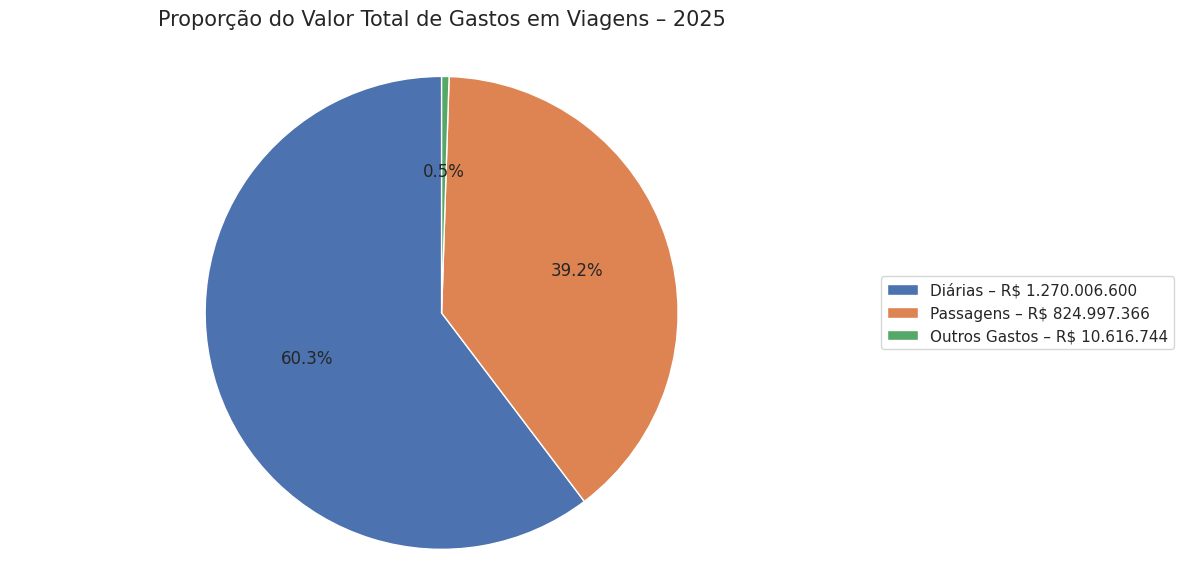

In [100]:

total_diarias = df['Valor diárias'].sum()
total_passagens = df['Valor passagens'].sum()
total_outros = df['Valor outros gastos'].sum()

labels = ['Diárias', 'Passagens', 'Outros Gastos']
valores = [total_diarias, total_passagens, total_outros]


def formatar_reais(valor):
    return f'R$ {valor:,.0f}'.replace(',', '.')

legendas = [
    f'Diárias – {formatar_reais(total_diarias)}',
    f'Passagens – {formatar_reais(total_passagens)}',
    f'Outros Gastos – {formatar_reais(total_outros)}'
]

plt.figure()

plt.pie(
    valores,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)

plt.legend(
    legendas,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=11
)

plt.title(
    'Proporção do Valor Total de Gastos em Viagens – 2025',
    fontsize=15,
    pad=20
)

plt.axis('equal')
plt.tight_layout()
plt.show()


A análise da composição dos gastos totais evidencia que a maior parte dos recursos é destinada às diárias, seguida pelas passagens, enquanto outros gastos representam uma parcela residual do total.  
A predominância das **diárias** indica que o tempo de permanência dos servidores em deslocamento é o principal fator de impacto financeiro, superando inclusive os custos de transporte. Esse padrão sugere viagens de média e longa duração, associadas a cursos, missões prolongadas, pesquisas de campo e operações institucionais.  
As **passagens** aparecem como o segundo maior componente de custo, refletindo a necessidade de deslocamentos interestaduais e, em alguns casos, de múltiplos trechos. Já os **outros gastos** possuem participação reduzida, indicando maior controle ou menor representatividade de despesas acessórias no contexto das viagens analisadas.  
Do ponto de vista das regras de negócio, essa distribuição reforça que políticas de gestão de diárias têm maior potencial de impacto na otimização de custos do que ações focadas exclusivamente em transporte ou despesas acessórias.  